In [1]:
import GI_parser as GIP
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib.ticker import NullFormatter
import glob
import time
import imageio

In [2]:
framebase=GIP.FrameBase("frames_B3_wire_1_W0028.txt") # 5 GB OF TOT's STRAIGHT INTO YOUR RAM

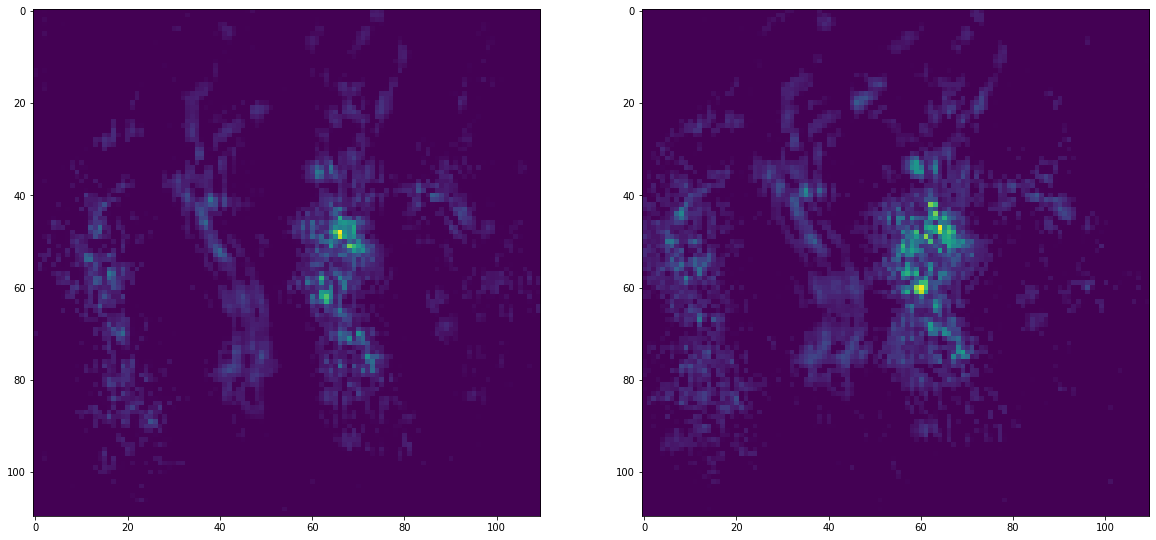

In [3]:
# Examine a frame, crop out the 2 beams


s1x1=120
s1x2=230

s1y1=140
s1y2=250

s2x1=30
s2x2=140

s2y1=25
s2y2=135

beam1=framebase[6000].data[s1x1:s1x2,s1y1:s1y2]
beam2=framebase[6000].data[s2x1:s2x2,s2y1:s2y2]
beam1[50,45]=0
beam1[45,50]=0



fig, ax = plt.subplots(ncols=2,nrows=1, figsize=(20, 20))

ax[0].imshow(beam1)
ax[1].imshow(beam2)

In [4]:
max_frames=400; #1000 Frames total

for i in range (1,max_frames):


    s1x1=120
    s1x2=230

    s1y1=140
    s1y2=250

    s2x1=30
    s2x2=140

    s2y1=25
    s2y2=135

    beam1=framebase[i*25].data[s1x1:s1x2,s1y1:s1y2] #Every 10 th frame [i*10]
    beam2=framebase[i*25].data[s2x1:s2x2,s2y1:s2y2]



    fig, ax = plt.subplots(ncols=2,nrows=1, figsize=(12, 12))

    ax[0].imshow(beam1)
    ax[1].imshow(beam2)
    
    fig.savefig("snap_{:04d}.png".format(i)) # THIS IS GOING TO SAVE EVERY FRAME IN THE FOLDER OF THE NOTEBOOK
    plt.clf()
    fig.clear()
    plt.cla()
    plt.close()
    if (i%100 == 0):
        print (i)


100
200
300


In [5]:
del framebase

animation_out_name="frames_B3_1_W0028_F03-.gif"



with imageio.get_writer(animation_out_name, mode='I',duration=0.05) as writer:
    for i in range(1,max_frames):
        image = imageio.imread("snap_{:04d}.png".format(i))
        writer.append_data(image)
        if (i%100 == 0):
            print (i)
        i+=1

100
200
300
